In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost
import warnings
warnings.filterwarnings('ignore')


In [52]:
data = pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', 500)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [53]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [54]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [55]:
def converter(data):
    data= pd.to_numeric(data, errors = 'coerce')
    return data

converter(data['packed cell volume'])
converter(data['white blood cell count'])

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white blood cell count, Length: 400, dtype: float64

In [56]:
df = data.copy()

from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in data:
        df[i] = label_encode.fit_transform(df[i])
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,35,62,30,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,42,72,44,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,37,61,36,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,39,67,41,0,3,1,0,0,0,2


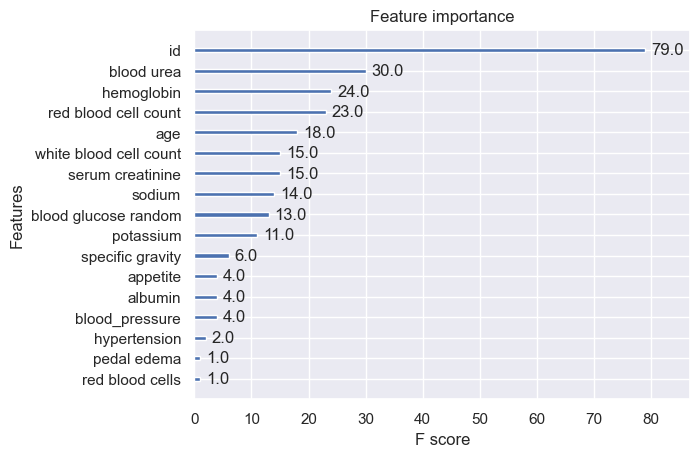

In [57]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('classes', axis = 1)
y = df.classes

model.fit(x, y)

# plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [74]:
sel_cols = ['blood urea', 'hemoglobin', 'red blood cell count', 'age', 'white blood cell count', 'serum creatinine', 'sodium', 'classes']
sel_data = df[sel_cols]
sel_data

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium,classes
0,36.0,15.4,34,48.0,72,1.2,NaN,0
1,18.0,11.3,49,7.0,56,0.8,NaN,0
2,53.0,9.6,49,62.0,70,1.8,NaN,0
3,56.0,11.2,19,48.0,62,3.8,111.0,0
4,26.0,11.6,27,51.0,68,1.4,NaN,0
...,...,...,...,...,...,...,...,...
395,49.0,15.7,30,55.0,62,0.5,150.0,2
396,31.0,16.5,44,42.0,72,1.2,141.0,2
397,26.0,15.8,36,12.0,61,0.6,137.0,2
398,50.0,14.2,41,17.0,67,1.0,135.0,2


In [59]:
import warnings
warnings.filterwarnings('ignore')
sel_data.dropna(inplace = True)
sel_data.shape

(271, 8)

<Axes: xlabel='classes', ylabel='count'>

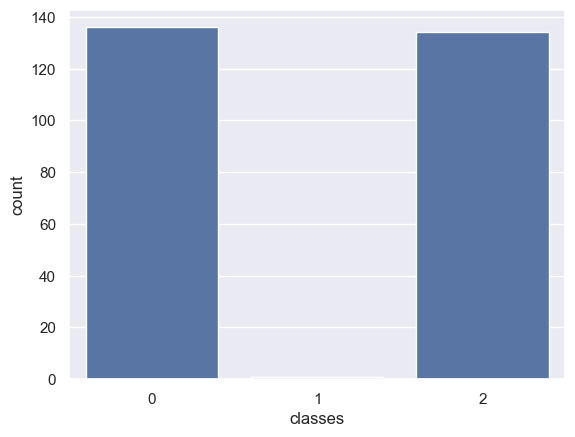

In [60]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.classes)

In [90]:
sel_data = sel_data.loc[sel_data['classes'] != 1]

In [91]:
# Split Into Train and Test
# split into train and test
x = sel_data.drop('classes', axis = 1)
y = sel_data.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       199
           2       0.98      0.99      0.99       119

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [93]:
# serialise transformers and model
import joblib

joblib.dump(label_encode, 'encoder.pkl')
joblib.dump(rf_model, 'kidney_model.pkl')


['kidney_model.pkl']

In [94]:
# new patients data to predict the classes of their kkidney disease
new_patients = sel_data.sample(10).drop('classes', axis = 1)
new_patients

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium
398,50.0,14.2,41,17.0,67,1.0,135.0
106,118.0,6.0,49,50.0,60,6.1,127.0
360,39.0,14.7,44,35.0,54,0.5,135.0
354,17.0,14.6,33,32.0,63,0.4,147.0
87,47.0,11.1,31,70.0,54,2.9,NaN
147,36.0,7.9,10,60.0,29,1.7,130.0
151,46.0,9.6,49,76.0,92,1.7,141.0
166,44.0,NaN,49,27.0,92,3.9,127.0
222,68.0,NaN,49,74.0,92,1.8,NaN
51,66.0,10.3,49,54.0,92,1.6,136.0


In [95]:
new_patients.dropna(inplace = True)
new_patients

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium
398,50.0,14.2,41,17.0,67,1.0,135.0
106,118.0,6.0,49,50.0,60,6.1,127.0
360,39.0,14.7,44,35.0,54,0.5,135.0
354,17.0,14.6,33,32.0,63,0.4,147.0
147,36.0,7.9,10,60.0,29,1.7,130.0
151,46.0,9.6,49,76.0,92,1.7,141.0
51,66.0,10.3,49,54.0,92,1.6,136.0


In [96]:
import joblib
imported_model = joblib. load('kidney_model.pkl')
imported_model

RandomForestClassifier()

In [97]:
imported_model.predict(new_patients)

array([2, 0, 2, 2, 0, 0, 0])

In [99]:
data.iloc[106] ['classes']

'ckd'